In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pathlib import Path
import pathlib
# necessary libraries
import os

import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
from skimage.io import imread
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

In [2]:
print(tf.__version__)

2.12.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install split-folders

In [6]:
!pip install mplcyberpunk
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [7]:
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [45]:
path=Path("/content/drive/MyDrive/RS_images_2800/RS_images_2800")

In [41]:
def get_Label(number):
    labels = {


              0 : 'aGrass',
              1 : 'bField',
              2 : 'cIndustry',
              3 : 'dRiverLake',
              4 : 'eForest',
              5 : 'fResident',
              6 : 'gParking'
    }
    return labels[number]

In [33]:
def plot_predection(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Prediction  Images", fontsize=20)
    count = 0
    for i in range (35) :
        plt.subplot(5,7,i+1)
        img = plt.imread(df['image'].iloc[i])
        img = cv2.resize(img,(224,224))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        feature = model_name.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("A : "+df['label'].iloc[i],fontsize=12,color='red')
        plt.ylabel("P :"+get_Label(int(predection)),fontsize=12,color ='green')
        count += 1
        if count == 34 :
            break


In [34]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,7))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

In [35]:
def freezing_layers(model_name):
    for layer in model_name.layers:
      layer.trainable = False

In [53]:
import os.path
from sklearn.model_selection import train_test_split

In [46]:
filepaths=list(path.glob(r'**/*.jpg'))
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
filepaths=pd.Series(filepaths,name='Filepaths').astype(str)
labels=pd.Series(labels,name='Label')
images=pd.concat([filepaths,labels],axis=1)
category_samples=[]

for category in images['Label'].unique():
    category_slices=images.query('Label==@category')
    category_samples.append(category_slices.sample(frac=1,random_state=1))
image_df=pd.concat(category_samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)

In [47]:
image_df=pd.concat(category_samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)

In [48]:
image_df

,Filepaths,Label
0,/content/drive/MyDrive/RS_images_2800/RS_image...,bField
1,/content/drive/MyDrive/RS_images_2800/RS_image...,aGrass
2,/content/drive/MyDrive/RS_images_2800/RS_image...,cIndustry
3,/content/drive/MyDrive/RS_images_2800/RS_image...,aGrass
4,/content/drive/MyDrive/RS_images_2800/RS_image...,fResident
...,...,...
2795,/content/drive/MyDrive/RS_images_2800/RS_image...,dRiverLake
2796,/content/drive/MyDrive/RS_images_2800/RS_image...,aGrass
2797,/content/drive/MyDrive/RS_images_2800/RS_image...,aGrass
2798,/content/drive/MyDrive/RS_images_2800/RS_image...,eForest


In [49]:
image_df['Label'].value_counts()

bField        400
aGrass        400
cIndustry     400
fResident     400
dRiverLake    400
gParking      400
eForest       400
Name: Label, dtype: int64

In [54]:
train_df,test_df=train_test_split(image_df,train_size=0.7,shuffle=True,random_state=1)

In [55]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [57]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1568 validated image filenames belonging to 7 classes.
Found 391 validated image filenames belonging to 7 classes.
Found 841 validated image filenames belonging to 7 classes.


In [58]:
pretrained_model=tf.keras.applications.MobileNetV2(
     input_shape=(224,224,3),
     include_top=False,
     weights='imagenet',
     pooling='avg'

)
pretrained_model.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [61]:
inputs=pretrained_model.input
x=tf.keras.layers.Dense(128,activation='relu')(pretrained_model.output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
outputs=tf.keras.layers.Dense(7,activation='softmax')(x)
model=tf.keras.Model(inputs,outputs)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [69]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
49/49 [==============================] - 18s 241ms/step - loss: 0.1502 - accuracy: 0.9445 - val_loss: 0.3687 - val_accuracy: 0.8798
Epoch 2/5
49/49 [==============================] - 11s 227ms/step - loss: 0.0683 - accuracy: 0.9802 - val_loss: 0.3447 - val_accuracy: 0.8977
Epoch 3/5
49/49 [==============================] - 10s 213ms/step - loss: 0.0387 - accuracy: 0.9904 - val_loss: 0.4290 - val_accuracy: 0.8645
Epoch 4/5
49/49 [==============================] - 11s 228ms/step - loss: 0.0380 - accuracy: 0.9853 - val_loss: 0.3581 - val_accuracy: 0.8900
Epoch 5/5
49/49 [==============================] - 11s 221ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.4005 - val_accuracy: 0.8951


In [70]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 89.30%


In [71]:
predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

27/27 [==============================] - 5s 148ms/step


In [76]:
model.save("MobileNetV2.h5")

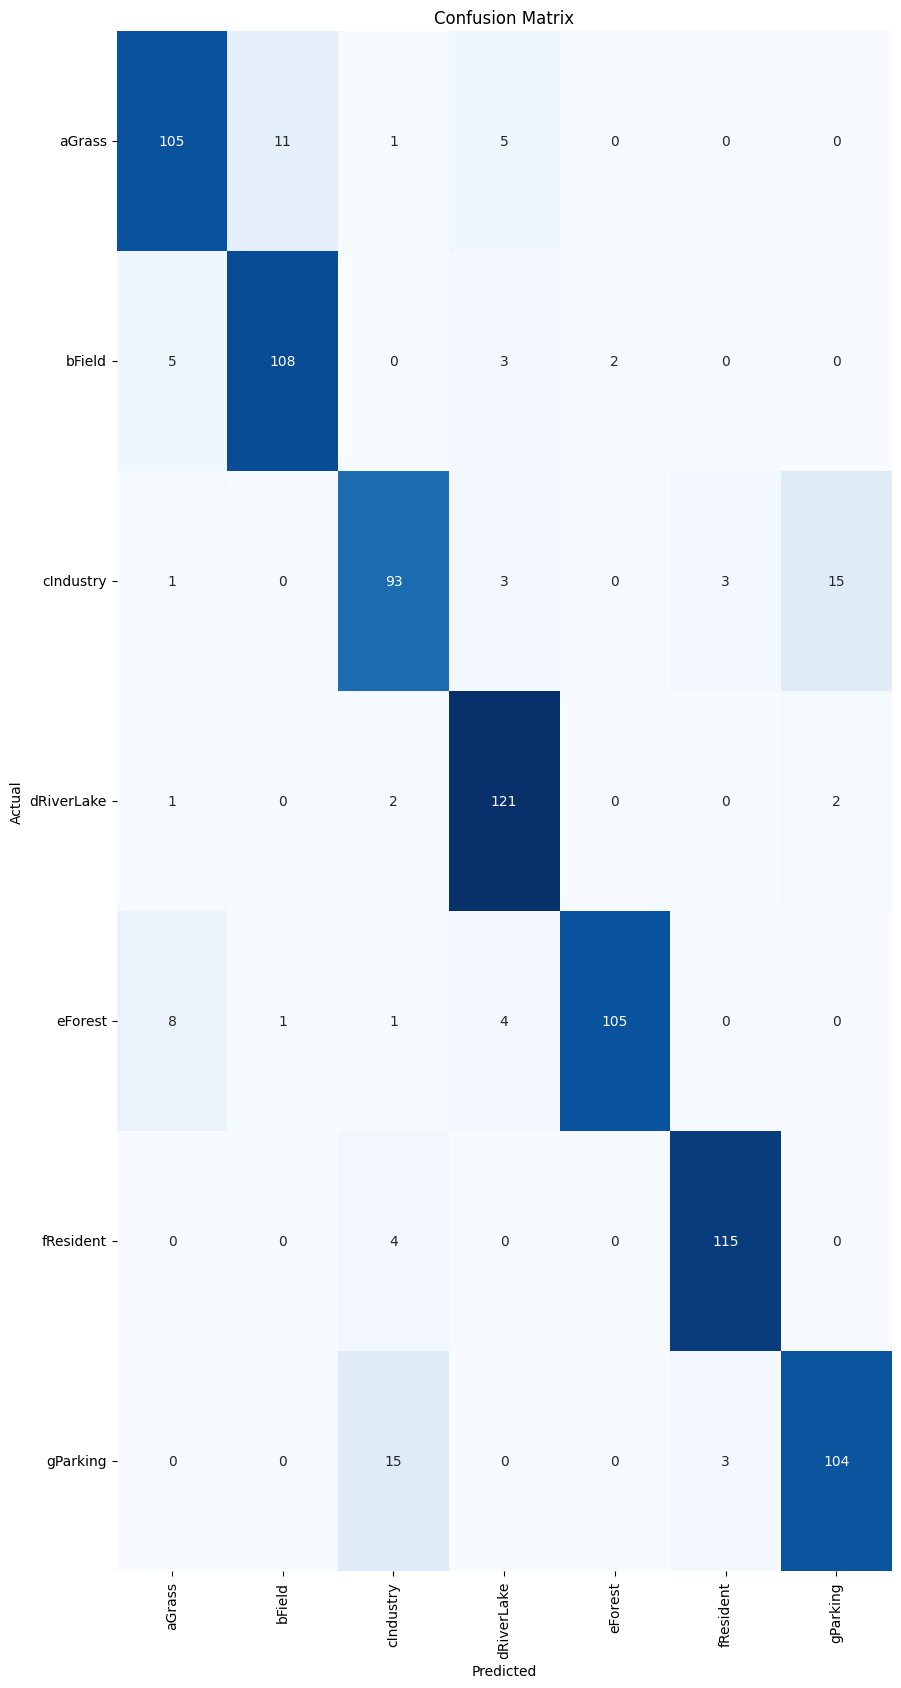

In [73]:
plt.figure(figsize=(10,20))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(7) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(7) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [74]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

      aGrass       0.88      0.86      0.87       122
      bField       0.90      0.92      0.91       118
   cIndustry       0.80      0.81      0.81       115
  dRiverLake       0.89      0.96      0.92       126
     eForest       0.98      0.88      0.93       119
   fResident       0.95      0.97      0.96       119
    gParking       0.86      0.85      0.86       122

    accuracy                           0.89       841
   macro avg       0.89      0.89      0.89       841
weighted avg       0.89      0.89      0.89       841

